In [50]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import cv2

In [2]:
size = 600, 400
im = Image.open("try.jpg")
im_resized = im.resize(size, Image.ANTIALIAS)

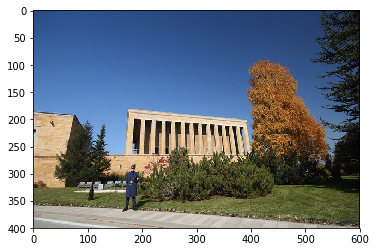

In [3]:
plt.imshow(im_resized)

In [4]:
image = np.array(im_resized)

In [5]:
image.shape ## 400 *600 *3 

(400, 600, 3)

In [6]:
#convert it to gray scale

In [7]:
img_gray_scale = im_resized.convert('L')

In [8]:
img_gray_np = np.array(img_gray_scale)

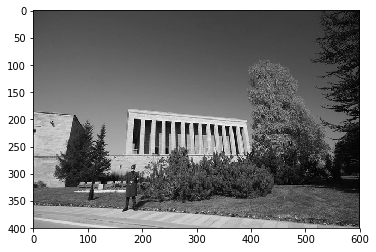

In [9]:
plt.imshow(img_gray_np, cmap='gray', vmin=0, vmax=255)

In [10]:
img_gray_np = img_gray_np #imageyi normalize etmeye gerek yok bence

In [11]:
##Test fft
#sequence  
ar1 = np.random.rand(225)
# fft 
transform = np.fft.fft(ar1) 
a= np.abs(transform)

In [51]:
#Test Surf
import cv2

In [13]:
surf = cv2.xfeatures2d.SURF_create(extended = 1)#128 feature veriyor şu an
key_point = cv2.KeyPoint(25, 25, 15)
#result = surf.compute(grayscale_img,key_point)
_,a = surf.compute(img_gray_np,[key_point])
#surf.compute(img,key_point)
img_gray_np
a

array([[ 1.00221997e-02,  1.00221997e-02,  9.71322879e-05,
         9.71322879e-05,  1.22245343e-03,  1.65885885e-03,
         0.00000000e+00,  0.00000000e+00,  3.11563462e-02,
         4.36406992e-02,  2.64224429e-02,  3.07441968e-02,
         8.57120322e-04,  2.91058142e-02,  2.77712266e-03,
         7.09887547e-03,  5.02560101e-02,  6.93244115e-02,
         2.30481429e-03,  5.29804034e-03,  1.78625584e-02,
         2.54654121e-02,  6.60177600e-03,  9.59500205e-03,
         1.79146405e-03,  3.49262846e-03,  1.17555610e-03,
         1.34927849e-03, -1.92132243e-03,  6.06472790e-03,
         7.63720891e-04,  9.37443343e-04,  4.16955799e-02,
         4.16955799e-02,  1.33413766e-02,  1.88256353e-02,
         3.51715856e-03,  2.35896911e-02, -2.74212868e-03,
         2.74212868e-03,  2.55697161e-01,  2.69377291e-01,
         1.06333956e-01,  1.16209939e-01,  4.15160134e-02,
         2.98328161e-01, -4.93799942e-03,  4.93799942e-03,
         3.18209529e-01,  3.18209529e-01,  5.26120327e-0

In [14]:
qab = q[:, :, 1:3]
ql = q[:, :, 0]
# the luminosity for computing surf parameters must be an integer and is offset by 128 compared to self.l
#self.l = self.lab[:, :, 0]

NameError: name 'q' is not defined

In [15]:
#self.rgb = cv2.imread(filename)
#self.lab = cv2.cvtColor(self.rgb, cv.CV_BGR2Lab)
#self.ab = self.lab[:, :, 1:3]
# the luminosity for computing surf parameters must be an integer and is offset by 128 compared to self.l
#self.l = self.lab[:, :, 0]


In [52]:
def all_feature_vector(grayscale_img,window):
    x = len(grayscale_img[:,0])
    y = len(grayscale_img[0,:])
    length = len(feature_vector(int(window/2 + 1),int(window/2 + 1),window,grayscale_img))
    feature = np.zeros((length,(x-window+1)*(y-window+1)))
    count = 0
    for r in range(int(window/2), x-int(window/2)):
        for c in range(int(window/2), y-int(window/2)):
            pixel_vector = feature_vector(r,c,window,grayscale_img)
            feature[:,count] = pixel_vector
            count = count +1
    return feature

In [53]:
def feature_vector(x,y,window,grayscale_img):
    sigma1 = 1.0
    sigma2 = 1.5
    ftf = create_ftf_vector(x,y,window,grayscale_img)
    surf1 = create_surf_vector(x,y,window,grayscale_img)
    surf2 = create_surf_vector(x,y,window,cv2.GaussianBlur(grayscale_img, (0, 0), sigma1))
    surf3 = create_surf_vector(x,y,window,cv2.GaussianBlur(grayscale_img, (0, 0), sigma2))
    mean_var = create_meanvar_vector(x,y,window,grayscale_img)
    return np.concatenate((ftf.flatten(),surf1.flatten(),surf2.flatten(),surf3.flatten(),mean_var.flatten()))

In [54]:
def create_ftf_vector(x,y,window,grayscale_img):
    points = neighbors(x,y,window,grayscale_img)
    result = np.abs(np.fft.fft(points.reshape(-1)))
    return result             



In [55]:
def create_surf_vector(x,y,window,grayscale_img):
    surf = cv2.xfeatures2d.SURF_create(extended = 1)#128 feature veriyor şu an
    key_point = cv2.KeyPoint(25, 25, 15)
    _,result = surf.compute(grayscale_img,[key_point])
    return result


In [56]:
def create_meanvar_vector(x,y,window,grayscale_img): #add mean variance and luminance itself
    result = []
    luminance = [grayscale_img[x,y]]
    points = neighbors(x,y,window,grayscale_img)
    mean = [np.mean(points)]
    var = [np.var(points)]
    result.append(var)
    result.append(mean)
    result.append(luminance)
    return np.array(result)

In [57]:
def neighbors(x,y,window,grayscale_img): #return the all window pixels centered at p.
    startx = x - int(window/2)
    finishx = x + int(window/2) +1
    starty = y - int(window/2)
    finishy = y + int(window/2) +1
    return grayscale_img[startx:finishx, starty:finishy] 

[[ 93  91  91 ...  10  10   8]
 [ 92  90  91 ...   8   9   8]
 [ 93  93  93 ...   7   9   9]
 ...
 [154 154 155 ...  86 119  56]
 [155 155 156 ... 147 147 141]
 [153 152 153 ... 146 146 153]]
(400, 600)


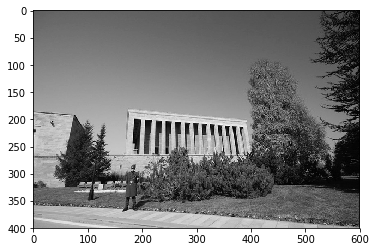

In [58]:
size = 600, 400
im = Image.open("try.jpg")
im_resized = im.resize(size, Image.ANTIALIAS)
#img = cv2.imread('try.jpg') ##Surf yaparken 256ya bölme. Fft yaparken de bölmeyebilirsin belki de.

#im_resized = img.resize(size, Image.ANTIALIAS)
qlab = cv2.cvtColor(np.array(im_resized),cv2.COLOR_BGR2LAB)##LAB dimensions kullanılacak.
grayscale_img = qlab[:,:,0]
print(grayscale_img)
np_grayscale_img = np.array(grayscale_img)
print(np_grayscale_img.shape)
plt.imshow(np_grayscale_img, cmap='gray', vmin=0, vmax=255)

In [59]:
window = 15
vector = all_feature_vector(np.array(grayscale_img),window)

In [60]:
a = np.random.rand(9)
b = np.random.rand(8)

In [61]:
np.concatenate((a,b))

array([0.10467355, 0.71617972, 0.39899659, 0.97367122, 0.28746963,
       0.53304085, 0.99639355, 0.57017515, 0.13432862, 0.22984291,
       0.24710906, 0.63687471, 0.75400547, 0.75473359, 0.30977666,
       0.94348537, 0.86940796])

In [62]:
x = np.array(vector)

In [63]:
vector.shape

(612, 226196)

In [64]:
vector[:,-1]

array([ 1.71100000e+04,  3.05070116e+03,  2.98796612e+03,  1.59991518e+03,
        8.62514237e+02,  8.90731021e+02,  4.60633532e+02,  3.96198878e+02,
        4.05704959e+02,  5.07302227e+02,  3.45508908e+02,  6.56644900e+02,
        1.13848377e+03,  5.79672606e+02,  7.48295099e+02,  5.61795691e+02,
        3.88807768e+02,  2.40774223e+02,  7.01229291e+02,  4.59129846e+02,
        5.15915493e+02,  6.06690028e+02,  2.90902306e+02,  1.85957110e+02,
        2.79394385e+02,  6.20477506e+02,  4.90271621e+02,  4.29145359e+02,
        3.43088338e+02,  1.14119051e+02,  1.11824976e+02,  4.15552246e+02,
        1.98284628e+02,  2.49745432e+02,  3.90177405e+02,  1.89648756e+02,
        1.48180560e+02,  2.10336805e+02,  1.99196776e+02,  2.70923236e+02,
        5.79169085e+02,  5.41479283e+02,  7.41126853e+01,  3.11148540e+02,
        3.12436959e+02,  2.32917774e+02,  1.55261037e+02,  6.56929976e+02,
        1.78905398e+02,  2.55492072e+02,  1.59305933e+02,  1.65261881e+02,
        2.24797175e+02,  

In [65]:
def pca(feature_vector):
    centered = np.add(feature_vector,-np.mean(feature_vector,axis=1).reshape(-1,1))
    return np.linalg.svd(centered)

In [66]:
np.random.shuffle(np.transpose(vector))
np.random.shuffle(np.transpose(vector))
u,e,v, = pca(vector[:,0:10000])

In [81]:
(sum(e[0:30]) / sum(e))



0.7193032400141595

In [105]:
arr = []
s = sum(e)
th = 0
for i in range(len(e)):
    arr.append((sum(e[0:i+1]) /s))
    if (sum(e[0:i+1]) /s) == 1:
        th = i
    if i > 200:
        break


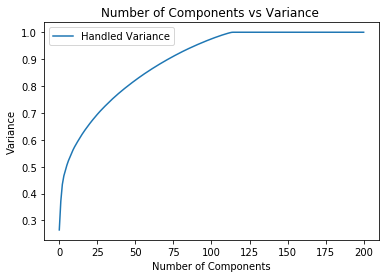

201
202


In [111]:
y = range(th)
plt.plot(y,arr[0:th])
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Number of Components vs Variance ')
plt.legend(['Handled Variance'])
plt.show()
print(th)
print(len(arr))

In [70]:
np.mean(vector[:,0:10000],axis=1).shape

(612,)

In [71]:
q = np.random.rand(3,4)
q

array([[0.73291247, 0.63044781, 0.01034167, 0.24375663],
       [0.77369132, 0.47008694, 0.47331864, 0.67139802],
       [0.22332585, 0.98763593, 0.73301141, 0.27094361]])

In [72]:
np.mean(q,axis=1)

array([0.40436464, 0.59712373, 0.5537292 ])

In [73]:
h = np.array([[2,3,4],[2,3]])

In [74]:
q = np.random.rand(3,4)
q

array([[0.90497763, 0.30377348, 0.93461371, 0.64283217],
       [0.61765553, 0.4428457 , 0.92031162, 0.46307893],
       [0.92227319, 0.47134075, 0.68238897, 0.3154936 ]])

In [75]:
np.random.shuffle(np.transpose(q))
np.random.shuffle(np.transpose(q))

In [76]:
q

array([[0.90497763, 0.93461371, 0.64283217, 0.30377348],
       [0.61765553, 0.92031162, 0.46307893, 0.4428457 ],
       [0.92227319, 0.68238897, 0.3154936 , 0.47134075]])